In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing   

#Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
#Pruning – is nothing but cutting down some nodes to stop overfitting.

In [2]:
# import some data to play with
Fraud_check = pd.read_csv('Fraud_check.csv')
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
Fraud_check_df = Fraud_check.rename(columns={'Marital.Status': 'MaritalStatus', 'Taxable.Income': 'TaxableIncome','City.Population': 'CityPopulation', 'Work.Experience': 'WorkExperience'})
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
Fraud_check_df['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [5]:
Fraud_check_df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [6]:
Fraud_check_df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [7]:
Fraud_check_df['Undergrad'] = Fraud_check_df['Undergrad'].map({'YES':1 ,'NO':0})
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,Single,68833,50047,10,YES
1,1,Divorced,33700,134075,18,YES
2,0,Married,36925,160205,30,YES
3,1,Single,50190,193264,15,YES
4,0,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES
596,1,Divorced,69967,55369,2,YES
597,0,Divorced,47334,154058,0,YES
598,1,Married,98592,180083,17,NO


In [8]:
Fraud_check_df['Urban'] = Fraud_check_df['Urban'].map({'YES':1 ,'NO':0})
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [9]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check_df['MaritalStatus']= label_encoder.fit_transform(Fraud_check_df['MaritalStatus']) 
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
Fraud_check_df['MaritalStatus'].unique()

array([2, 0, 1])

In [12]:
Fraud_check_df.query('TaxableIncome <=  30000').count()

Undergrad         124
MaritalStatus     124
TaxableIncome     124
CityPopulation    124
WorkExperience    124
Urban             124
dtype: int64

In [13]:
Fraud_check_df['Fraudulent'] = Fraud_check_df['TaxableIncome'].apply(lambda x: 1 if x <= 30000 else 0)
Fraud_check_df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Fraudulent
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [15]:
Fraud_check_df.query('Fraudulent == 1').count()

Undergrad         124
MaritalStatus     124
TaxableIncome     124
CityPopulation    124
WorkExperience    124
Urban             124
Fraudulent        124
dtype: int64

In [40]:
Fraud_check_df['Fraudulent'].unique()

array([0, 1], dtype=int64)

In [22]:
Fraud_check_df.columns

Index(['Undergrad', 'MaritalStatus', 'TaxableIncome', 'CityPopulation',
       'WorkExperience', 'Urban', 'Fraudulent'],
      dtype='object')

In [23]:
Fraud_check_df = Fraud_check_df[['Undergrad', 'MaritalStatus',  'CityPopulation', 'WorkExperience', 'Urban','TaxableIncome', 'Fraudulent']]
Fraud_check_df

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome,Fraudulent
0,0,2,50047,10,1,68833,0
1,1,0,134075,18,1,33700,0
2,0,1,160205,30,1,36925,0
3,1,2,193264,15,1,50190,0
4,0,1,27533,28,0,81002,0
...,...,...,...,...,...,...,...
595,1,0,39492,7,1,76340,0
596,1,0,55369,2,1,69967,0
597,0,0,154058,0,1,47334,0
598,1,1,180083,17,0,98592,0


In [60]:
x=Fraud_check_df.iloc[:,0:6]
y=Fraud_check_df['Fraudulent']
x

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002
...,...,...,...,...,...,...
595,1,0,39492,7,1,76340
596,1,0,55369,2,1,69967
597,0,0,154058,0,1,47334
598,1,1,180083,17,0,98592


In [61]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraudulent, Length: 600, dtype: int64

In [62]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [63]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(480, 6) (120, 6) (480,) (120,)


# Building Decision Tree Classifier using Entropy Criteria

In [64]:
#Entropy is nothing but the uncertainty in our dataset or measure of disorder. Entropy basically measures the impurity of a node. Impurity is the degree of randomness; it tells how random our data is. A pure sub-split means that either you should be getting “yes”, or you should be getting “no”. we need to calculate the impurity of each split, and when the purity is 100%, we make it as a leaf node.
#Always remember that the higher the Entropy, the lower will be the purity and the higher will be the impurity. As mentioned earlier the goal of machine learning is to decrease the uncertainty or impurity in the dataset,
#E(s) = -p(+) log p(+) - p(-) log p(-); Here p+ is the probability of positive class p– is the probability of negative classS is the subset of the training example

#Information gain measures the reduction of uncertainty given some feature and it is also a deciding factor for which attribute should be selected as a decision node or root node.
#E(y) / E(Y|X); entropy of the full dataset – entropy of the dataset given some feature
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

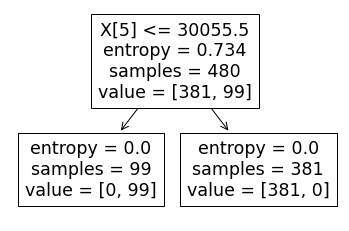

In [65]:
#PLot the decision tree
tree.plot_tree(model);

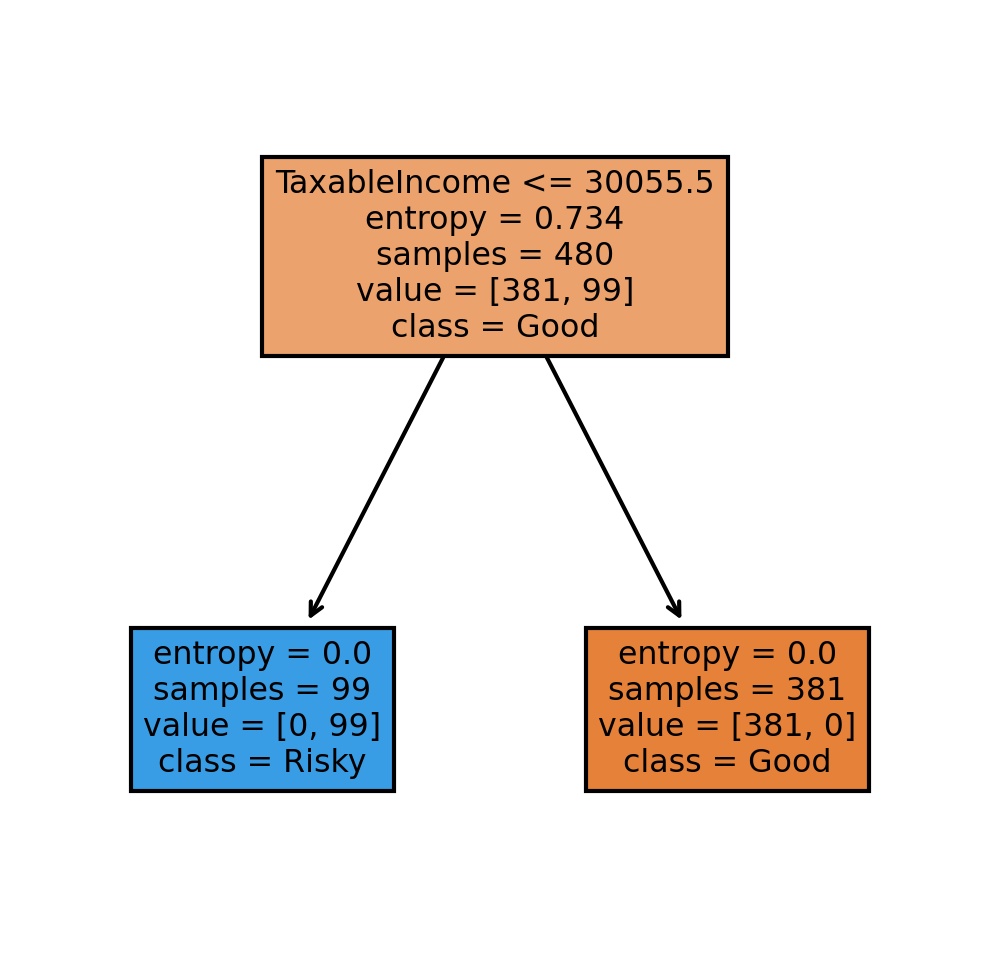

In [67]:
fn=['Undergrad', 'MaritalStatus',  'CityPopulation', 'WorkExperience', 'Urban','TaxableIncome']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#class_names - Names of each of the target classes in ascending numerical order. Only relevant for classification and not supported for multi-output. If True, shows a symbolic representation of the class name.

In [68]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    95
1    25
dtype: int64

In [69]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Fraudulent,,
0,95,0
1,0,25


In [70]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [71]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
#Gini impurity - Used by the CART (classification and regression tree) algorithm for classification trees. is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The Gini impurity can be computed by summing the probability {\displaystyle p_{i}}p_{i} of an item with label {\displaystyle i}i being chosen times the probability {\displaystyle \sum _{k\neq i}p_{k}=1-p_{i}}{\displaystyle \sum _{k\neq i}p_{k}=1-p_{i}} of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.
#To split a node Decision Tree algorithm needs best attribute & threshold value. Selection of best attribute & threshold value pair (f,t) happens based on below algorithms which will give you the purest nodes.

In [72]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
pred
np.mean(pred==y_test)

1.0

In [74]:
pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

# Decision Tree Regression Example

In [75]:
# Decision Tree Regression
#Regression trees are needed when the response variable is numeric or continuous.
from sklearn.tree import DecisionTreeRegressor

In [76]:
model = DecisionTreeRegressor(criterion='mse',max_depth=3)
model.fit(x_train, y_train)
preds = model.predict(x_train)
preds

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [77]:
from sklearn.metrics import mean_squared_error
residual = mean_squared_error(preds,y_train)
residual
#In statistics, the mean squared error (MSE)[1] or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

0.0

In [78]:
#Find the accuracy
model.score(x_test,y_test)

1.0

In [81]:
#test score
preds = model.predict(x_test)
preds

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1.])

In [82]:
from sklearn.metrics import mean_squared_error
residual = mean_squared_error(preds,y_test)
residual

0.0